In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [3]:
df = pd.read_csv('fifa_players.csv')
df['id'] = df.index
df.set_index('id', inplace=True)

In [4]:
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
id,,,,,,,,,,,,,,,,,,,,,
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null  obje

# Remove irrelevant columns

In [6]:
df.drop(['name', 'full_name', 'birth_date'], axis=1, inplace=True)

In [7]:
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# df.describe().T

In [8]:
df.columns

Index(['age', 'height_cm', 'weight_kgs', 'positions', 'nationality',
       'overall_rating', 'potential', 'value_euro', 'wage_euro',
       'preferred_foot', 'international_reputation(1-5)', 'weak_foot(1-5)',
       'skill_moves(1-5)', 'body_type', 'release_clause_euro', 'national_team',
       'national_rating', 'national_team_position', 'national_jersey_number',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

# Check duplicated values

In [9]:
df.duplicated().sum()

np.int64(0)

# Histogram

<Axes: >

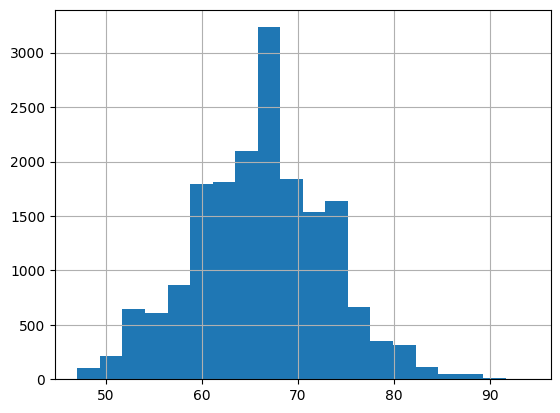

In [10]:
df['overall_rating'].hist(bins=20)

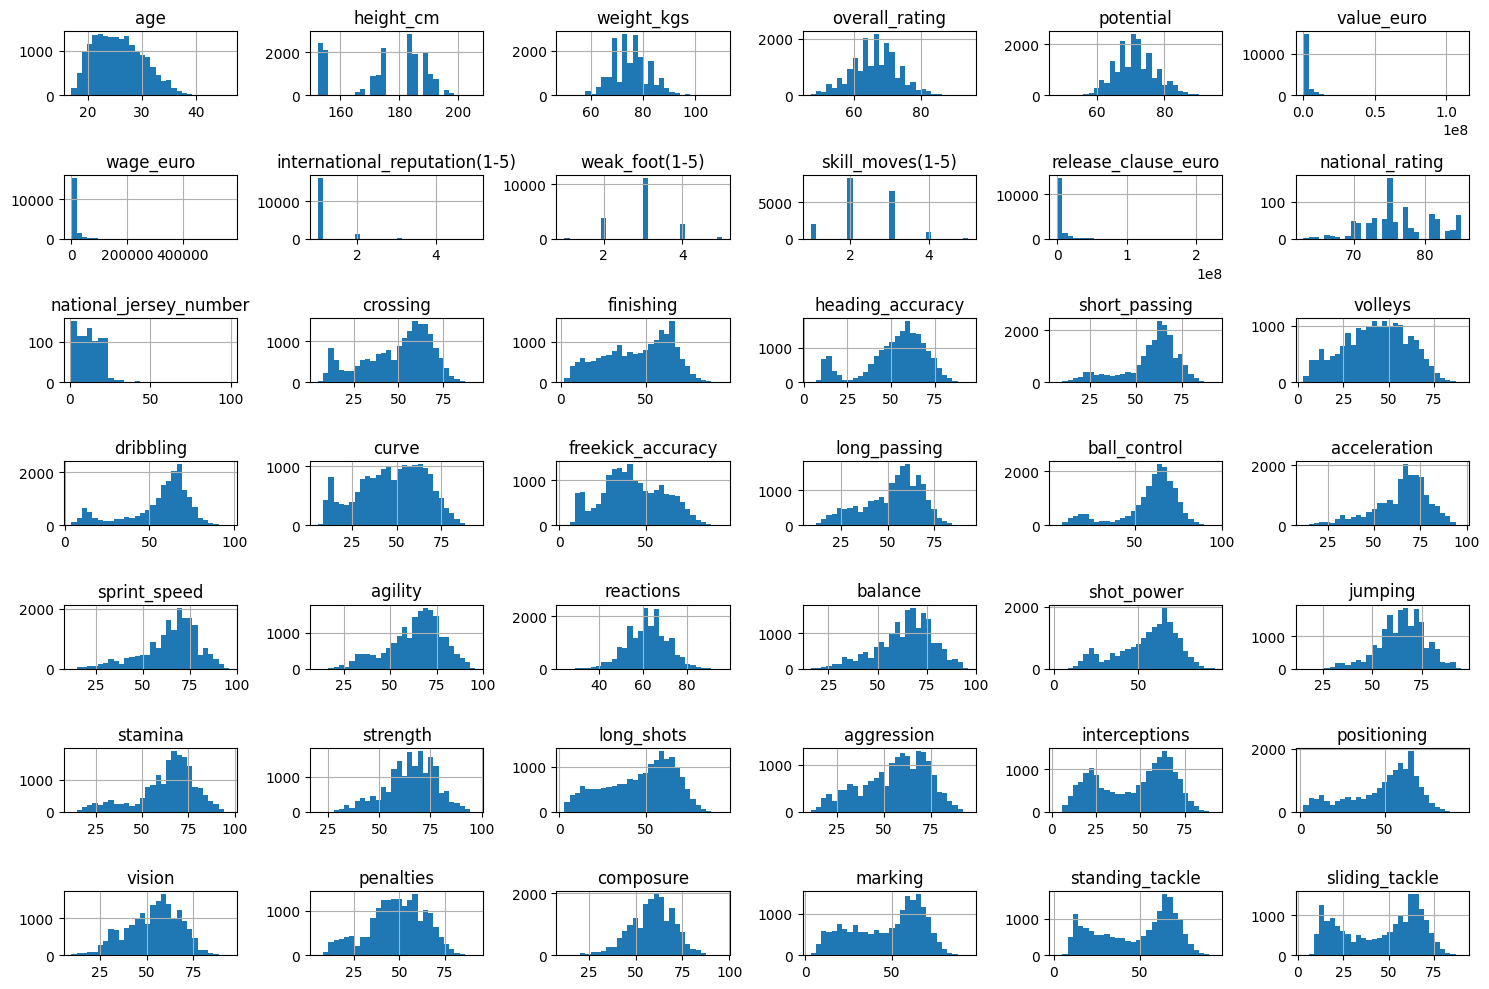

In [11]:
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

- imbalance data
- outliers
- missing data
- string attributes

# Missing values

In [12]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing

value_euro                  255
wage_euro                   246
release_clause_euro        1837
national_team             17097
national_rating           17097
national_team_position    17097
national_jersey_number    17097
dtype: int64

In [13]:
df.drop([])

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
id,,,,,,,,,,,,,,,,,,,,,
0,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,...,94,48,22,94,94,75,96,33,28,26
1,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,...,89,46,56,84,91,67,88,59,57,22
2,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,...,82,78,64,82,88,82,87,63,67,67
3,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,...,84,34,26,83,87,61,83,51,24,22
4,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,...,15,87,88,24,49,33,80,91,88,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,25,175.26,74.8,"RM,CAM,CM",Scotland,67,70,975000.0,3000.0,Right,...,54,69,41,60,64,63,56,40,20,18
17950,23,182.88,79.8,LB,Slovakia,59,67,190000.0,1000.0,Left,...,22,62,55,42,39,32,52,53,64,60
17951,22,185.42,89.8,GK,Netherlands,59,67,170000.0,1000.0,Right,...,9,27,10,5,25,16,47,9,12,13


# Handle "String" values

In [14]:
object_cols = df.select_dtypes(include='object').columns
print(object_cols)

Index(['positions', 'nationality', 'preferred_foot', 'body_type',
       'national_team', 'national_team_position'],
      dtype='object')


In [15]:
for col in object_cols:
    print(f'{col}: {df[col].nunique()}')

positions: 890
nationality: 160
preferred_foot: 2
body_type: 10
national_team: 103
national_team_position: 29


In [16]:
for col in object_cols:
    print(f'{col}: {df[col].unique()}')
    print()

positions: ['CF,RW,ST' 'CAM,RM,CM' 'CM,CAM' 'LW,ST' 'CB' 'RW,ST,RM' 'ST' 'GK'
 'CDM,CM' 'CF,ST' 'RW,ST' 'CAM,RW' 'CDM' 'CM,CDM' 'LB' 'CM,CAM,CDM'
 'CAM,CM,LW' 'CAM,CM,RM' 'LW,ST,LM' 'CAM,CM' 'CAM' 'LW,RW' 'RW,LW' 'CM,LM'
 'CM' 'RM,RW' 'LM,RM,CAM,LW' 'LM' 'RW,RM' 'LM,ST,RM' 'RB' 'LM,RM,LW,RW'
 'LM,CAM,RM' 'RM,LM,ST' 'RW' 'LM,ST,RM,LW' 'CM,CDM,CAM' 'CM,CDM,CB'
 'CB,CDM' 'CF,ST,CAM' 'CDM,CB' 'RB,RWB' 'RM' 'LM,CAM' 'CM,LW' 'LB,LWB,LM'
 'ST,LW' 'LM,LB,CM' 'RB,RM' 'RM,LM,CM' 'LM,RM,CAM' 'RM,RW,ST' 'LW,LM,RW'
 'LB,LM' 'ST,LW,LM' 'RM,CM' 'CM,RM' 'CB,RB' 'RM,RW,LM' 'LM,RM' 'CDM,CB,CM'
 'CAM,CDM' 'LB,CDM' 'CAM,RM,LM' 'RM,CAM,CM' 'LWB' 'CDM,CM,LM' 'CDM,CM,RM'
 'CDM,CM,CB' 'CAM,LW' 'RM,LM' 'ST,CAM' 'LM,CM' 'ST,CF,CAM,LM'
 'LWB,LB,CB,LM' 'RB,LB' 'LW' 'CAM,ST' 'LM,RM,LW' 'LWB,LM,LB'
 'ST,CF,LM,CAM' 'LM,LW,ST' 'LB,LWB' 'RWB,RB,RM' 'ST,RW' 'CAM,CM,LM'
 'RB,RW' 'RM,CAM,LM' 'ST,RM' 'RM,ST' 'CM,LM,RM' 'CM,CAM,LM' 'RW,RWB'
 'LM,RB' 'RM,LM,RW,CAM' 'ST,RM,RWB,LM' 'LB,RB' 'CM,CDM,RM' 'LM,LW'
 'CAM,ST,RM' 'ST

## preferred_foot

In [17]:
df['preferred_foot'].value_counts()

preferred_foot
Right    13781
Left      4173
Name: count, dtype: int64

In [18]:
df['preferred_foot'] = df['preferred_foot'].map({'Right': 1, 'Left': 0})
df['preferred_foot'].value_counts()

preferred_foot
1    13781
0     4173
Name: count, dtype: int64

## body_type

In [19]:
df['body_type'].value_counts()

body_type
Normal                 10393
Lean                    6468
Stocky                  1086
Messi                      1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
Shaqiri                    1
Neymar                     1
C. Ronaldo                 1
Name: count, dtype: int64

In [20]:
valid_body_types = ['Lean', 'Normal', 'Stocky']
df = df[df['body_type'].isin(valid_body_types)]
df['body_type'].value_counts()

body_type
Normal    10393
Lean       6468
Stocky     1086
Name: count, dtype: int64

In [21]:
df = pd.get_dummies(df, columns=['body_type'], drop_first=True)
df.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,...,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,body_type_Normal,body_type_Stocky
id,,,,,,,,,,,,,,,,,,,,,
1,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,1,...,56,84,91,67,88,59,57,22,False,False
2,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,1,...,64,82,88,82,87,63,67,67,True,False
3,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,1,...,26,83,87,61,83,51,24,22,True,False
4,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,1,...,88,24,49,33,80,91,88,87,True,False
5,27,193.04,92.1,CB,Netherlands,88,90,59500000.0,215000.0,1,...,88,41,60,62,87,90,89,84,True,False


In [22]:
object_cols = df.select_dtypes(include='object').columns
print(object_cols)

Index(['positions', 'nationality', 'national_team', 'national_team_position'], dtype='object')


In [23]:
df.drop(['national_team', 'national_team_position'], axis=1, inplace=True)

In [24]:
object_cols = df.select_dtypes(include='object').columns
print(object_cols)

Index(['positions', 'nationality'], dtype='object')


## positions

In [25]:
df['positions'] = df['positions'].str.split(',')
df['positions']

id
1        [CAM, RM, CM]
2            [CM, CAM]
3             [LW, ST]
4                 [CB]
5                 [CB]
             ...      
17949    [RM, CAM, CM]
17950             [LB]
17951             [GK]
17952         [ST, LM]
17953             [ST]
Name: positions, Length: 17947, dtype: object

In [26]:
df_exploded = df.explode('positions')
df_encoded = pd.get_dummies(df_exploded, columns=['positions'])

one_hot_columns = [col for col in df_encoded.columns if col.startswith('positions_')]
df_one_hot_sum = df_encoded[one_hot_columns].groupby('id').sum()
df_final = df.drop(columns=['positions']).join(df_one_hot_sum)

df = df_final

In [28]:
pd.set_option('display.max_columns', None)
df.head()

,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),release_clause_euro,national_rating,national_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,body_type_Normal,body_type_Stocky,positions_CAM,positions_CB,positions_CDM,positions_CF,positions_CM,positions_GK,positions_LB,positions_LM,positions_LW,positions_LWB,positions_RB,positions_RM,positions_RW,positions_RWB,positions_ST
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,27,154.94,76.2,Denmark,88,89,69500000.0,205000.0,1,3,5,4,133800000.0,78.0,10.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,False,False,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,25,190.50,83.9,France,88,91,73000000.0,255000.0,1,4,4,5,144200000.0,84.0,6.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,True,False,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,27,162.56,59.0,Italy,88,88,62000000.0,165000.0,1,3,4,4,105400000.0,83.0,10.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,True,False,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,27,187.96,88.9,Senegal,88,91,60000000.0,135000.0,1,3,3,2,106500000.0,NaN,NaN,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,True,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,27,193.04,92.1,Netherlands,88,90,59500000.0,215000.0,1,3,3,2,114500000.0,81.0,4.0,53,52,83,79,45,70,60,70,81,76,74,77,61,87,49,81,88,75,92,64,82,88,41,60,62,87,90,89,84,True,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# Feature engineering

In [29]:
def is_star_player(player):
    return player['international_reputation(1-5)'] >= 3 or player['value_euro'] >= 1e7 or player['wage_euro'] >= 1e5

df['is_star_player'] = df.apply(is_star_player, axis=1)

In [30]:
df['is_star_player'].value_counts()

is_star_player
False    16892
True      1055
Name: count, dtype: int64

In [31]:
df.drop(['international_reputation(1-5)'], axis=1, inplace=True)

In [34]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing

value_euro                  255
wage_euro                   246
release_clause_euro        1837
national_rating           17096
national_jersey_number    17096
dtype: int64

# Create new data

In [32]:
df.to_csv('data.csv', index=False)